# ( Ford GoBike system data analysis)
## by Dana Alotaibi

## Preliminary Wrangling

> Ford goBike is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.

**Data wrangling**

**Gathering data**

In [252]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
df=pd.read_csv('201905-baywheels-tripdata.csv', sep =';')

In [147]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,No
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,No
2,5912,2019-05-31 23:54:24.0890,2019-06-01 01:32:56.9820,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,No
3,2629,2019-05-31 23:59:57.4490,2019-06-01 00:43:46.8740,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,No
4,4235,2019-05-31 23:05:48.9320,2019-06-01 00:16:24.4570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,No


# Assessing data


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182163 entries, 0 to 182162
Data columns (total 14 columns):
duration_sec               182163 non-null int64
start_time                 182163 non-null object
end_time                   182163 non-null object
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182163 non-null float64
start_station_longitude    182163 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182163 non-null float64
end_station_longitude      182163 non-null float64
bike_id                    182163 non-null int64
user_type                  182163 non-null object
bike_share_for_all_trip    182163 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 19.5+ MB


In [149]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,182163.000000,182148.000000,182163.000000,182163.000000,182148.000000,182163.000000,182163.000000,182163.000000
mean,792.261744,141.369480,37.763583,-122.346701,139.308118,37.763770,-122.345875,1964.698753
std,1824.190023,117.435373,0.112150,0.129110,117.210619,0.111985,0.128349,1136.197266
min,61.000000,3.000000,37.311284,-122.453704,3.000000,37.311284,-122.453704,12.000000
25%,357.000000,44.000000,37.770030,-122.411738,42.000000,37.770407,-122.410662,1025.000000
50%,568.000000,101.000000,37.780526,-122.397437,98.000000,37.780955,-122.396906,1930.000000
75%,882.000000,240.000000,37.796248,-122.285171,238.000000,37.797280,-122.288665,2977.000000
max,84967.000000,427.000000,37.880222,-121.870099,427.000000,37.880222,-121.870099,7196.000000


In [150]:
df.isnull().sum()

duration_sec                0
start_time                  0
end_time                    0
start_station_id           15
start_station_name         15
start_station_latitude      0
start_station_longitude     0
end_station_id             15
end_station_name           15
end_station_latitude        0
end_station_longitude       0
bike_id                     0
user_type                   0
bike_share_for_all_trip     0
dtype: int64

# cleaning data 

**Define**

delete null values of start_station_id and the rest

**Code**

In [151]:
df_clean = df[df['start_station_id'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182148 entries, 0 to 182162
Data columns (total 14 columns):
duration_sec               182148 non-null int64
start_time                 182148 non-null object
end_time                   182148 non-null object
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182148 non-null float64
start_station_longitude    182148 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182148 non-null float64
end_station_longitude      182148 non-null float64
bike_id                    182148 non-null int64
user_type                  182148 non-null object
bike_share_for_all_trip    182148 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 20.8+ MB


**Test**

In [152]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

**Define** 

change the datatype to datetime

**Code**

In [153]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Test**


In [154]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182148 entries, 0 to 182162
Data columns (total 14 columns):
duration_sec               182148 non-null int64
start_time                 182148 non-null datetime64[ns]
end_time                   182148 non-null datetime64[ns]
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182148 non-null float64
start_station_longitude    182148 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182148 non-null float64
end_station_longitude      182148 non-null float64
bike_id                    182148 non-null int64
user_type                  182148 non-null object
bike_share_for_all_trip    182148 non-null object
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 20.8+ MB


In [155]:
df_clean.shape

(182148, 14)

In [156]:
df_clean.duplicated().sum()

0

**Define** 

change user_type and bike_share_for_all_trip to category

**Code**

In [157]:
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

**Test**

In [158]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182148 entries, 0 to 182162
Data columns (total 14 columns):
duration_sec               182148 non-null int64
start_time                 182148 non-null datetime64[ns]
end_time                   182148 non-null datetime64[ns]
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182148 non-null float64
start_station_longitude    182148 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182148 non-null float64
end_station_longitude      182148 non-null float64
bike_id                    182148 non-null int64
user_type                  182148 non-null category
bike_share_for_all_trip    182148 non-null category
dtypes: category(2), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 18.4+ MB


In [159]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,No
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,No
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,No
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,No
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,No


**Define more features to observe**

**Code**

In [160]:
df_clean['end_time_hour']=df_clean['end_time'].dt.hour

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
df_clean['end_time_day']=df_clean['end_time'].dt.day.astype(int)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [198]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [199]:
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
df_clean['distance_miles'] = df_clean['distance_km'] * 0.621371

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Test**

In [200]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,end_time_hour,end_time_day,start_time_hour,start_time_day,start_time_weekday,duration_min,distance_km
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,...,1416,Customer,No,10,1,20,31,Fri,814.616667,0.839955
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,...,1797,Subscriber,No,8,1,19,31,Fri,784.166667,0.891040
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,...,3612,Customer,No,1,1,23,31,Fri,98.533333,0.000000
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,...,2333,Customer,No,0,1,23,31,Fri,43.816667,0.000000
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,...,181,Subscriber,No,0,1,23,31,Fri,70.583333,0.654002


**Define**

duration in minutes 

**Code**

In [166]:
df_clean['duration_min'] = df_clean['duration_sec']/60


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Test**

In [167]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182148 entries, 0 to 182162
Data columns (total 20 columns):
duration_sec               182148 non-null int64
start_time                 182148 non-null datetime64[ns]
end_time                   182148 non-null datetime64[ns]
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182148 non-null float64
start_station_longitude    182148 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182148 non-null float64
end_station_longitude      182148 non-null float64
bike_id                    182148 non-null int64
user_type                  182148 non-null category
bike_share_for_all_trip    182148 non-null category
end_time_hour              182148 non-null int64
end_time_day               182148 non-null int64
start_time_hour            182148 non-null int64
start_time_day    

In [168]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,end_time_hour,end_time_day,start_time_hour,start_time_day,start_time_weekday,duration_min
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,No,10,1,20,31,Fri,814.616667
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,No,8,1,19,31,Fri,784.166667
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,No,1,1,23,31,Fri,98.533333
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,No,0,1,23,31,Fri,43.816667
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,No,0,1,23,31,Fri,70.583333


## What is the structure of your dataset?

This dataset contains up to 182148 entries about the bike rides at may 2019 ( one month) in the San Francisco Bay Area. The features are: 

- Trip duration [ trip duration in seconds , start time, end time ] 
- Stations ( starting station name and ID , end station name and ID  (latitude/longitude)) 
- User information [ user type (Customer or Subscriber) ]
- Bike information [ Bike ID, Bike sharing information ] 


The fuatures i added are: 
- Start time weekday 
- Start time Day 
- Start time Hour 
- duration in minuets 
- Distance






## What is/are the main feature(s) of interest in your dataset?

- trip duration information such as the starting time of the trips and ending time of the trips, trip duration in seconds and minuets, days of the trips 

- user information where the user is either a subsciber or a customer


## Univariate Exploration

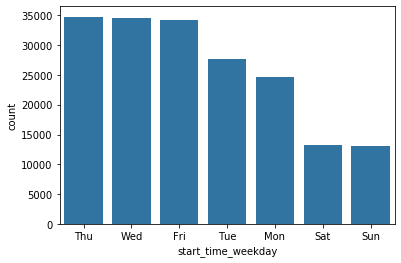

In [169]:
base_color = sb.color_palette()[0]
dayOrder = df_clean['start_time_weekday'].value_counts().index
sb.countplot(data = df_clean, x = 'start_time_weekday', color = base_color, order = dayOrder)

**Based on this observation bikes rides/rented bikes are more often on thursday, wednsday and friday**

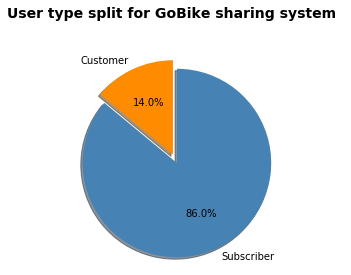

In [170]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');



**From this observation it is clear that Subscriber are more than customers** 

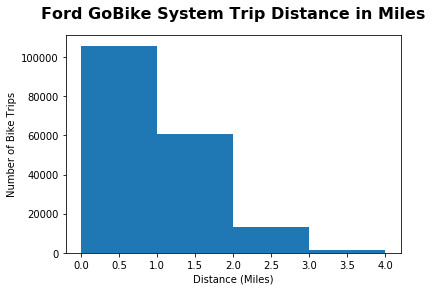

In [205]:
bin_edges = np.arange(0, 5, 1)

plt.hist(data = df_clean, x = 'distance_miles', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Miles", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Bike Trips');

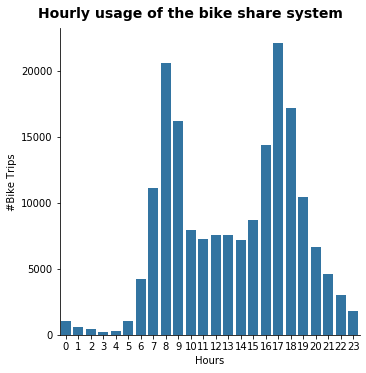

In [171]:
g = sb.catplot(data=df_clean, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

**From this observation we can see that at 8AM/6PM are the buseist hours**

**We can see from this observation that people mostly stop at 8AM or 5 pm**

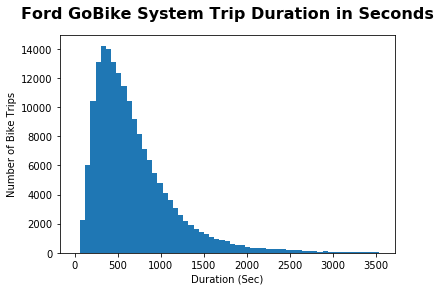

In [172]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

Trip duration is mostly [500s-1000s] 

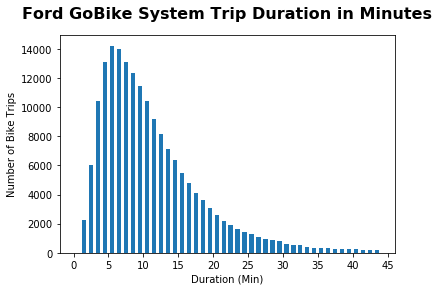

In [173]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');



**Trip duration is mostly 5 to 10 minuets**

**observations**

Most bike rides are on Friday, Thursday and Wednesday, subscribers are more than customers and most of the bike rides are less than 1 mile, most bike rides are on 8AM and 5 Pm and trip durations are mostly up to 500 -1000 seconds which is approximately 5-10 minutes 

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Thankfully the dataset is clean and noting seemed to be out of the ordinary however the duration may have taken a little effort but i set the max range to 3600 = 60 Min

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was nothing unusal in the dataset so i didn't adjust anything

# Bivariate Exploration 

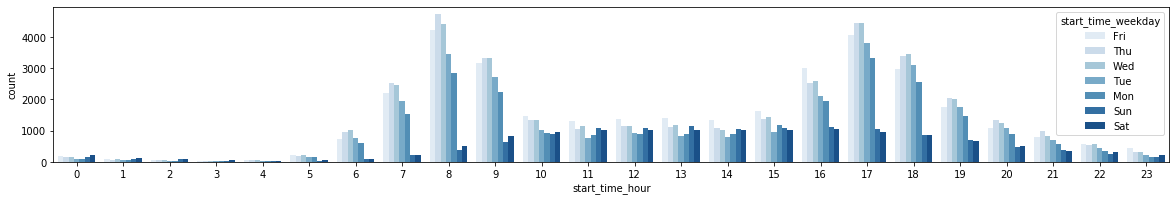

In [174]:
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'start_time_weekday', palette = 'Blues');

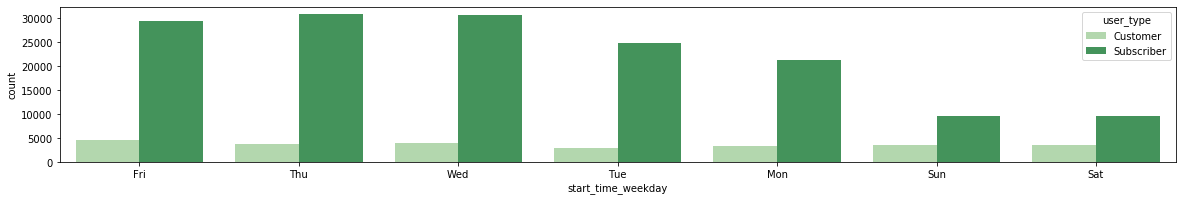

In [175]:
plt.figure(figsize = [20, 20]);
ax = plt.subplot(6, 1, 4);
sb.countplot(data = df_clean, x = 'start_time_weekday', hue = 'user_type', palette = 'Greens');

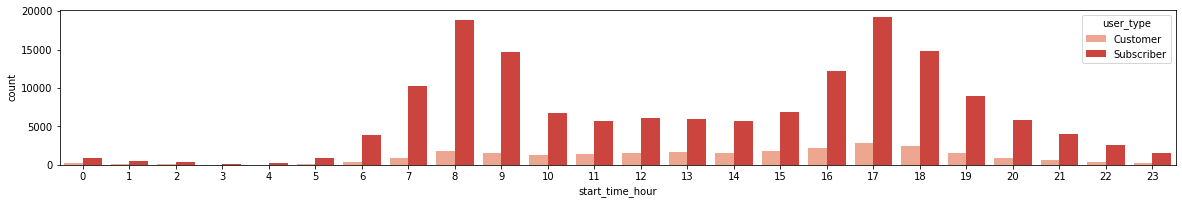

In [176]:
plt.figure(figsize = [20, 20]);
ax = plt.subplot(6, 1, 4);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type', palette = 'Reds');

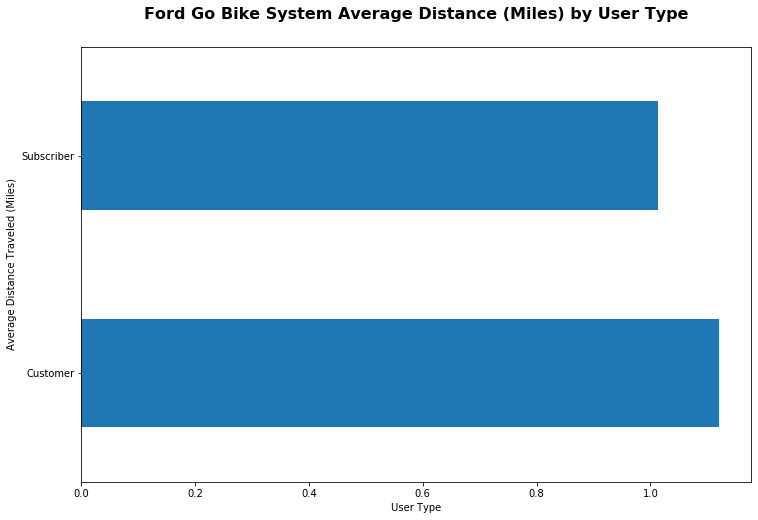

In [213]:
plt = df_clean.groupby('user_type')['distance_miles'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Average Distance (Miles) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('User Type')
plt.set_ylabel('Average Distance Traveled (Miles)');

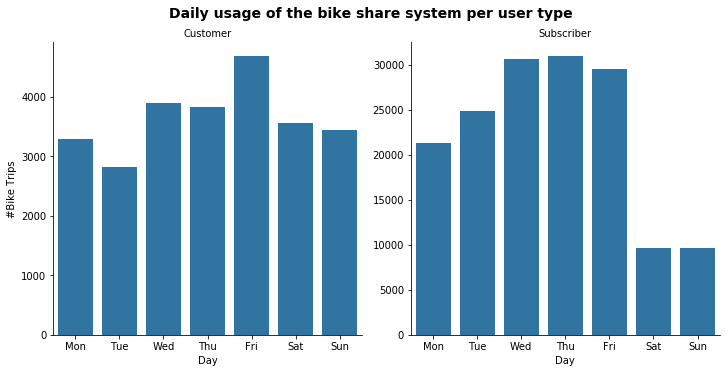

In [253]:
# daily usege of the bike sharing system per user type
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Day", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Daily usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


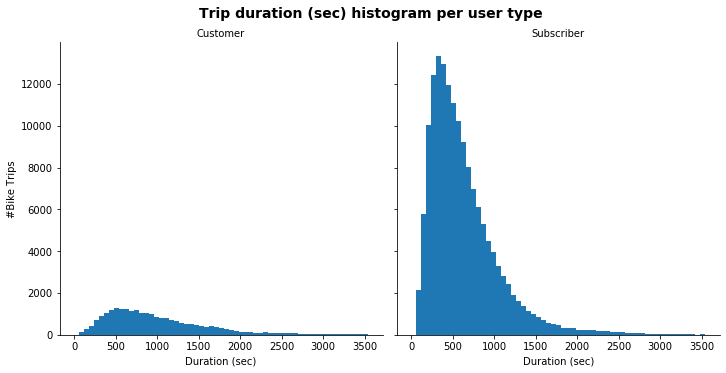

In [178]:
g = sb.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

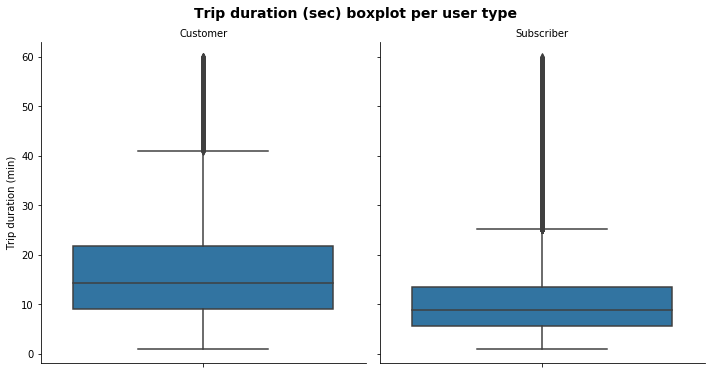

In [179]:
data = df_clean.query('duration_sec < 3600')
g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (min)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');


In [220]:
df_clean['distance_miles'].describe()

count    182148.000000
mean          1.027514
std           0.652802
min           0.000000
25%           0.566708
50%           0.878337
75%           1.349328
max          41.298652
Name: distance_miles, dtype: float64

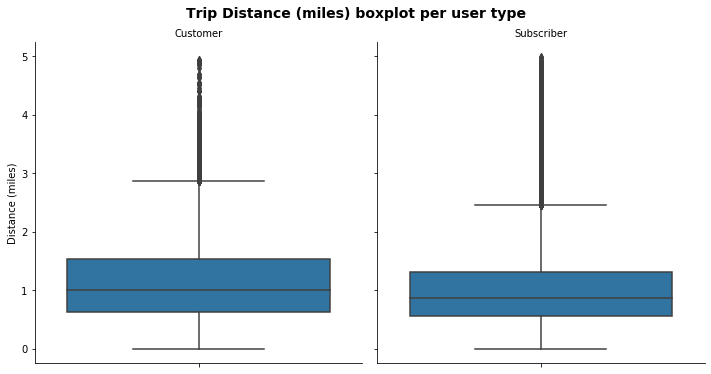

In [231]:
data = df_clean.query('distance_miles < 5')
g = sb.catplot(data=data, y='distance_miles', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Distance (miles)")
g.fig.suptitle('Trip Distance (miles) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

**Observations**

We already established that most bike rides are on Friday, Thursday and Wednesday and the majority start at 8AM or 6PM but from these observations we can indicate on each day’s trips hours such as: on Thursday the bike rides on 8AM are more frequent than any other time while on Thursday and Wednesday bike rides are almost equal at 6PM. Customers seem to have regular patterns except that bike rides on Friday are more frequent than other days. On the other hand subscribers are more active everyday other than Saturday and Sunday. Even though customers are far less than subscribers in numbers but the distance traveled by customers are a bit higher than subscribers. 
Customers trip durations are larger than subscribers’.

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Since the dataset only contains information about bike ride on may, adding the user type to the analysis showed similar behavior pattern between customers and subscribers since they both use the bikes mostly on Friday, Wednesday and Thursday approximately at similar times such as 8AM or 5Pm, maybe if the dataset contained information about bike rides during the year (different months) we would’ve been able to distinguish different behaviors between customers and subscribers

# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Customers trips duration and distance are greater than the subscribers even though Customers are much less than subscribers in numbers

# Multivariate Exploration

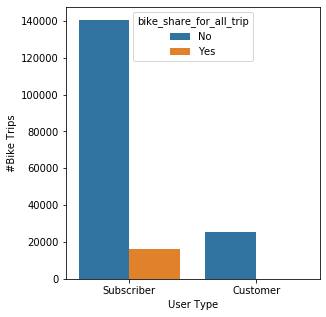

In [180]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=df_clean, x="user_type", hue="bike_share_for_all_trip", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');



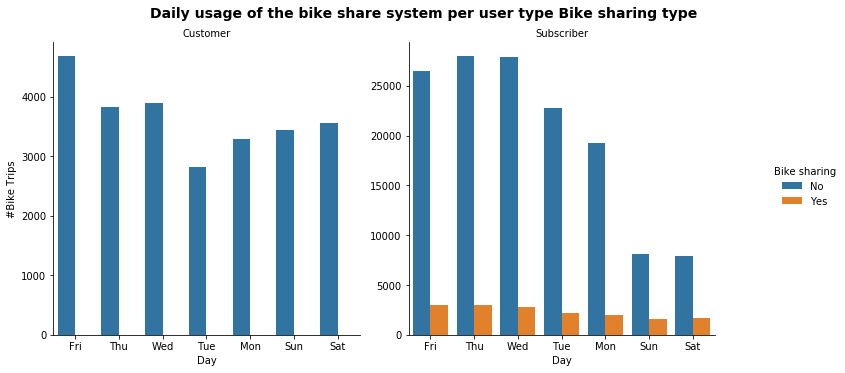

In [209]:
# daily usege of the bike sharing system per user type and gender

g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue="bike_share_for_all_trip", kind='count', sharey = False)
g.set_axis_labels("Day", "#Bike Trips")
g._legend.set_title('Bike sharing')
g.set_titles("{col_name}")
g.fig.suptitle('Daily usage of the bike share system per user type Bike sharing type', y=1.03, fontsize=14, fontweight='semibold');

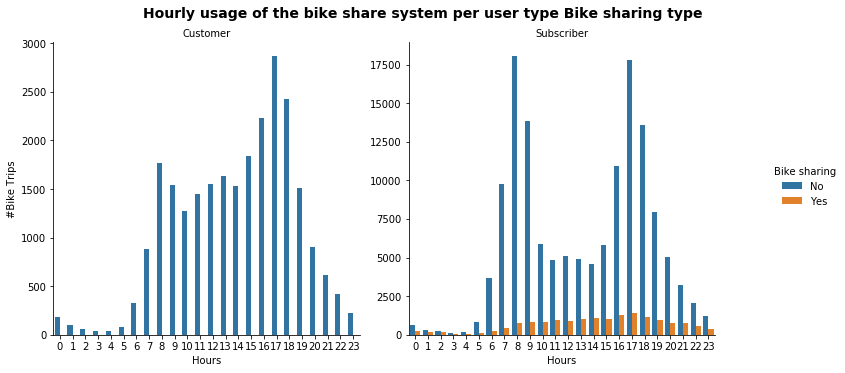

In [249]:
# hourly usege of the bike sharing system per user type and gender

g = sb.catplot(data=df_clean, x='start_time_hour', col="user_type", hue="bike_share_for_all_trip", kind='count', sharey = False)
g.set_axis_labels("Hours", "#Bike Trips")
g._legend.set_title('Bike sharing')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type Bike sharing type', y=1.03, fontsize=14, fontweight='semibold');

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


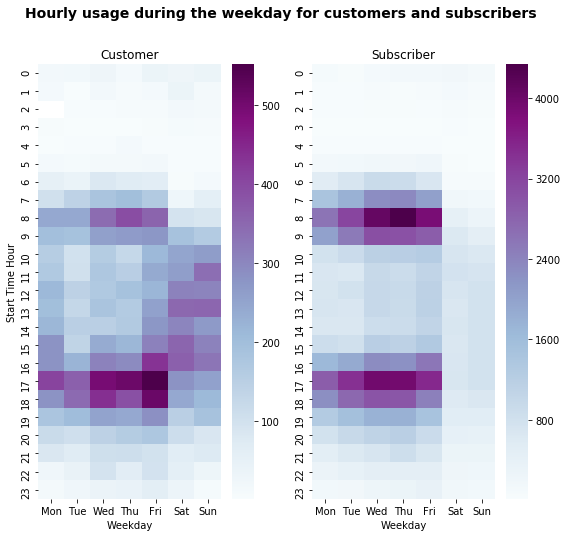

In [248]:
from matplotlib import *
import sys
import pylab as pl
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');



In [251]:
df_clean.to_csv('201905-baywheels-tripdataMaster.csv')

**observations**

Customers don’t share their bikes and a few of the subscribers do, subscribers who share their bikes are also very active during Friday, Thursday and Wednesday. And we can clearly see that customers bike ride duration is greater than subscribers’. 

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

analyzing user types and  daily trips and hours showed an interesting pattern where there was a clear difference between subscribers and customers which wasn’t clear in the previous observations such as indicating which day and which hour each user is active. and it was clear that  the majority of the users don’t share bikes. 

## Were there any interesting or surprising interactions between features?

Nothing out of the ordinary since but the the obervations were clearer in this part.

## Summary

This Dataset contains information about bike rides during may 2019, and by analyzing the data I found out that most of the bike rides we on Friday, Thursday and Wednesday it was slightly different for customers and subscribers where  subscribers are more active everyday other than Saturday and Sunday while customers are seem to have regular patterns except that bike rides on Friday are more frequent than other days. Most of the bike rides are done on 8AM or 6PM and I found out that customers rides are usually longer and travel longer distances than subscribers.
